In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix


In [23]:
df = pd.read_csv("Zomato Dataset.csv")
print(df.head())
print(df.info())

       ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0xcdcd      DEHRES17DEL01                   36                      4.2   
1  0xd987      KOCRES16DEL01                   21                      4.7   
2  0x2784     PUNERES13DEL03                   23                      4.7   
3  0xc8b6     LUDHRES15DEL02                   34                      4.3   
4  0xdb64      KNPRES14DEL02                   24                      4.7   

    Distance  Order_Date Time_Orderd Time_Order_picked Weather_conditions  \
0  10.280582   12/2/2022       21:55             22:10                Fog   
1   6.242319  13-02-2022       14:55             15:05             Stormy   
2  13.787860    4/3/2022       17:30             17:40         Sandstorms   
3   2.930258  13-02-2022        9:20              9:30         Sandstorms   
4  19.396618  14-02-2022       19:50             20:05                Fog   

  Road_traffic_density  Vehicle_condition Type_of_order Type_of_vehi

In [24]:
# Handle missing values
df = df.dropna()

# Handle missing values
df = df.dropna()

# Label Encoding
encoder = LabelEncoder()
categorical_cols = ['ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Delivery_person_ID', 'Weather_conditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


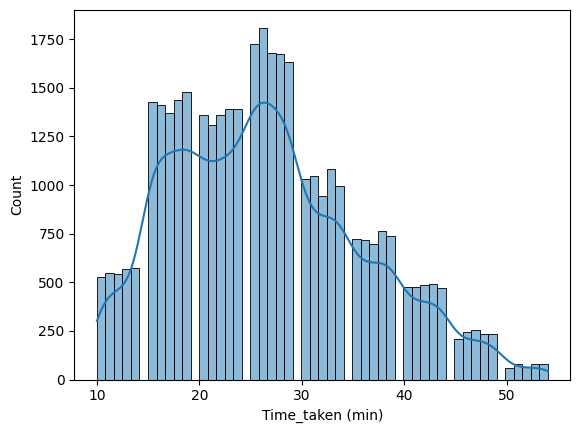

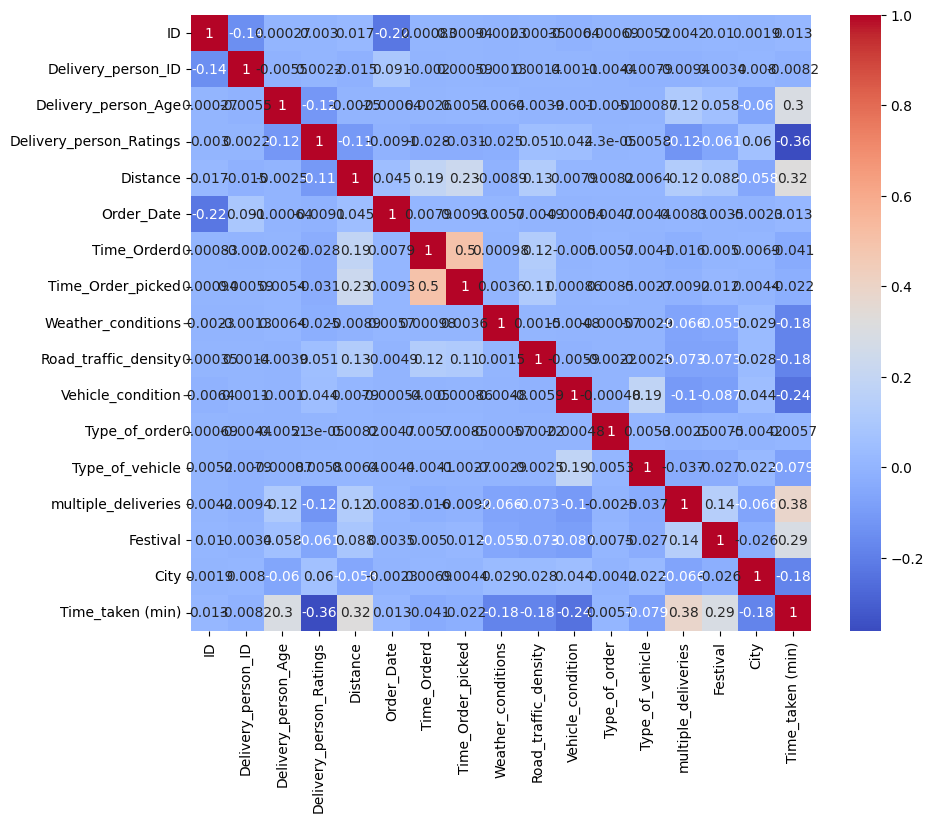

In [25]:
# Distribution plots
sns.histplot(df['Time_taken (min)'], kde=True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [27]:
import pandas as pd

# Step 1: Handle multicollinearity between features (excluding 'Time_taken (min)')
correlation_matrix = df.corr()

# Identify highly correlated features (threshold = 0.8) excluding 'Time_taken (min)'
high_corr_vars = []
for col in correlation_matrix.columns:
    if col != 'Time_taken (min)':  # Exclude target variable
        # Check correlation with other features
        for other_col in correlation_matrix.columns:
            if other_col != col and other_col != 'Time_taken (min)':
                if abs(correlation_matrix.loc[col, other_col]) > 0.8:
                    high_corr_vars.append(col)
                    break  # Add the column only once

# Drop highly collinear features
df_reduced = df.drop(columns=high_corr_vars)

# Step 2: Remove features with low correlation with 'Time_taken (min)'
if 'Time_taken (min)' in df_reduced.columns:  # Ensure target column exists
    # Calculate correlation of remaining features with 'Time_taken (min)'
    corr_with_target = df_reduced.corrwith(df_reduced['Time_taken (min)']).abs()

    # Identify features with correlation below threshold (e.g., 0.01)
    low_corr_vars = corr_with_target[corr_with_target < 0.1].index

    # Drop low-correlation features, excluding 'Time_taken (min)'
    df_final = df_reduced.drop(columns=[col for col in low_corr_vars if col != 'Time_taken (min)'])
else:
    print("'Time_taken (min)' column not found in the dataset.")
    df_final = df_reduced  # Retain reduced dataset

# Final dataset after preprocessing
print("Features after handling multicollinearity and low correlation:")
print(df_final.columns)


Features after handling multicollinearity and low correlation:
Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')


In [30]:
X = df_final.drop(columns=['Time_taken (min)'])
y = df_final['Time_taken (min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [31]:
models = {
    "LinearRegression": LinearRegression(),
    "SVR": SVR(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ANN": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2 = r2_score(y_test, y_pred_test)

    results[name] = {"MSE Train": mse_train, "MSE Test": mse_test,
                     "RMSE Train": rmse_train, "RMSE Test": rmse_test, "R2": r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                  MSE Train   MSE Test  RMSE Train  RMSE Test        R2
LinearRegression  43.213890  43.347574    6.573727   6.583887  0.512417
SVR               43.115545  44.127850    6.566243   6.642880  0.503641
DecisionTree       0.001500  27.326431    0.038734   5.227469  0.692626
RandomForest       2.136626  15.514015    1.461720   3.938783  0.825495
ANN               18.060338  18.698621    4.249746   4.324190  0.789674


Training R-squared: 0.9754956098164286, RMSE: 1.4572934299933575
Test R-squared: 0.8259019705391879, RMSE: 3.9341885040415834


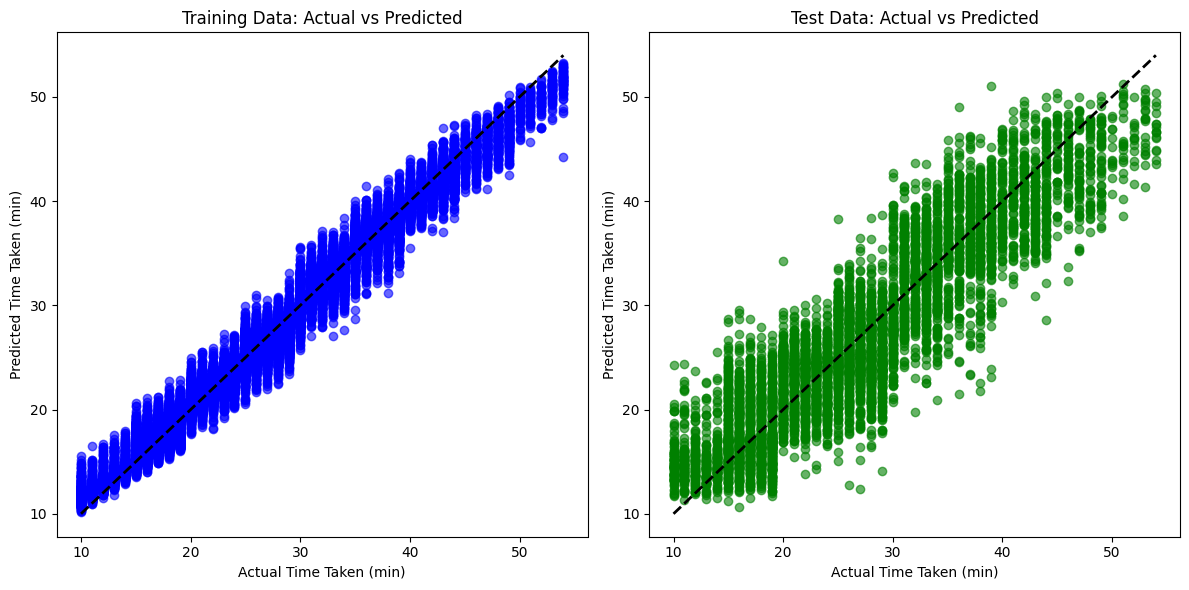

In [33]:
# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict on both training and test datasets
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Step 3: Evaluate R-squared and RMSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training R-squared: {r2_train}, RMSE: {rmse_train}")
print(f"Test R-squared: {r2_test}, RMSE: {rmse_test}")

# Step 4: Plot actual vs. predicted values
plt.figure(figsize=(12, 6))

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue')
plt.title("Training Data: Actual vs Predicted")
plt.xlabel("Actual Time Taken (min)")
plt.ylabel("Predicted Time Taken (min)")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)

# Test data plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green')
plt.title("Test Data: Actual vs Predicted")
plt.xlabel("Actual Time Taken (min)")
plt.ylabel("Predicted Time Taken (min)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.tight_layout()
plt.show()

Training Accuracy: 0.523691759817984
Test Accuracy: 0.1987602215774202

Training Confusion Matrix:
[[    0     0]
 [14445 15882]]

Training Classification Report:
              precision    recall  f1-score   support

   Incorrect       0.00      0.00      0.00         0
     Correct       1.00      0.52      0.69     30327

    accuracy                           0.52     30327
   macro avg       0.50      0.26      0.34     30327
weighted avg       1.00      0.52      0.69     30327


Test Confusion Matrix:
[[   0    0]
 [6075 1507]]

Test Classification Report:
              precision    recall  f1-score   support

   Incorrect       0.00      0.00      0.00         0
     Correct       1.00      0.20      0.33      7582

    accuracy                           0.20      7582
   macro avg       0.50      0.10      0.17      7582
weighted avg       1.00      0.20      0.33      7582



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

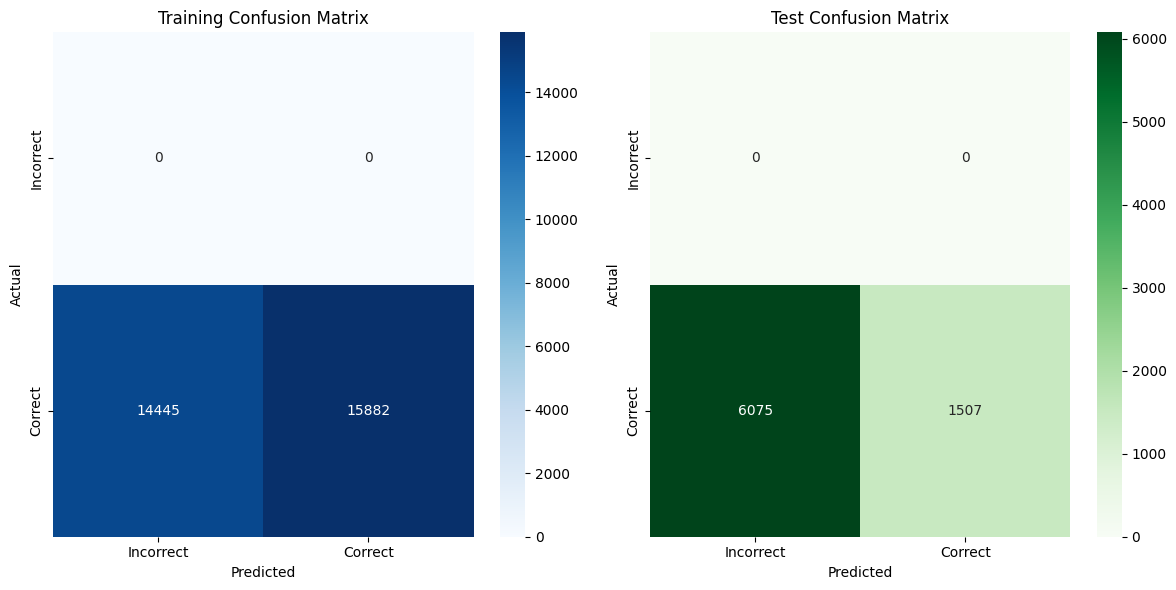

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Define tolerance threshold (e.g., ±1 minute)
tolerance = 1

# Function to classify predictions as Correct/Incorrect
def classify_predictions(actual, predicted, tolerance):
    return ['Correct' if abs(a - p) <= tolerance else 'Incorrect' for a, p in zip(actual, predicted)]

# Training dataset: Predicted vs Actual
train_classification = classify_predictions(y_train, y_train_pred, tolerance)

# Test dataset: Predicted vs Actual
test_classification = classify_predictions(y_test, y_test_pred, tolerance)

# Convert to binary classification (0 for Incorrect, 1 for Correct)
train_classification_binary = [1 if cls == 'Correct' else 0 for cls in train_classification]
test_classification_binary = [1 if cls == 'Correct' else 0 for cls in test_classification]

# Calculate accuracy for train and test datasets
train_accuracy = accuracy_score([1] * len(y_train), train_classification_binary)
test_accuracy = accuracy_score([1] * len(y_test), test_classification_binary)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Classification and Confusion Matrix
# For Train Dataset
train_conf_matrix = confusion_matrix([1] * len(y_train), train_classification_binary)
train_class_report = classification_report([1] * len(y_train), train_classification_binary, target_names=['Incorrect', 'Correct'])

# For Test Dataset
test_conf_matrix = confusion_matrix([1] * len(y_test), test_classification_binary)
test_class_report = classification_report([1] * len(y_test), test_classification_binary, target_names=['Incorrect', 'Correct'])

# Print Confusion Matrices and Reports
print("\nTraining Confusion Matrix:")
print(train_conf_matrix)
print("\nTraining Classification Report:")
print(train_class_report)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)
print("\nTest Classification Report:")
print(test_class_report)

# Visualization: Confusion Matrices
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Training Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Incorrect', 'Correct'], yticklabels=['Incorrect', 'Correct'])
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Test Confusion Matrix Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=['Incorrect', 'Correct'], yticklabels=['Incorrect', 'Correct'])
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


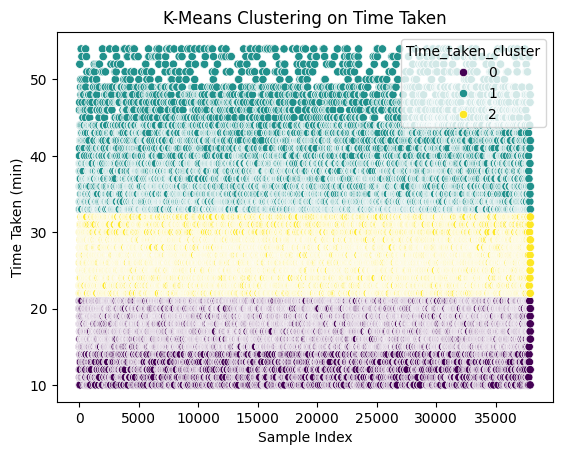

In [35]:
from sklearn.cluster import KMeans
import numpy as np

# Reshape the target variable for clustering
time_taken_reshaped = np.array(df['Time_taken (min)']).reshape(-1, 1)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters
df['Time_taken_cluster'] = kmeans.fit_predict(time_taken_reshaped)

# Visualize the clusters
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=range(len(time_taken_reshaped)), y=df['Time_taken (min)'], hue=df['Time_taken_cluster'], palette='viridis')
plt.title("K-Means Clustering on Time Taken")
plt.xlabel("Sample Index")
plt.ylabel("Time Taken (min)")
plt.show()

# Use the clusters as classes for classification tasks
y_clusters = df['Time_taken_cluster']


<ipython-input-36-e136a8dd8204>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Time_taken_category'], palette='coolwarm')


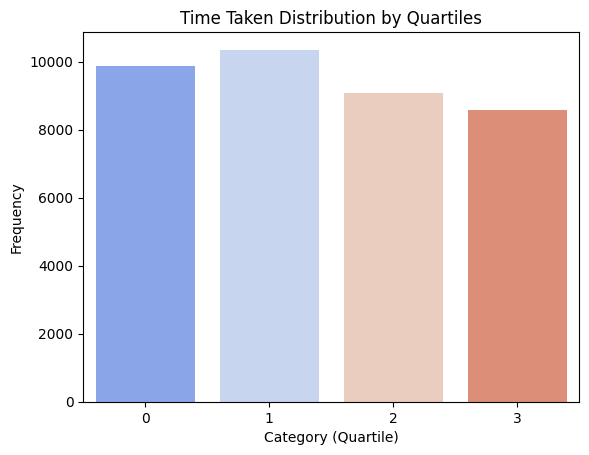

In [36]:
import pandas as pd

# Define bins based on quartiles
quartiles = pd.qcut(df['Time_taken (min)'], q=4, labels=[0, 1, 2, 3])  # 4 categories (quartiles)
df['Time_taken_category'] = quartiles

# Visualize the distribution of categories
sns.countplot(x=df['Time_taken_category'], palette='coolwarm')
plt.title("Time Taken Distribution by Quartiles")
plt.xlabel("Category (Quartile)")
plt.ylabel("Frequency")
plt.show()

# Use these categories as classes for classification tasks
y_binned = df['Time_taken_category']


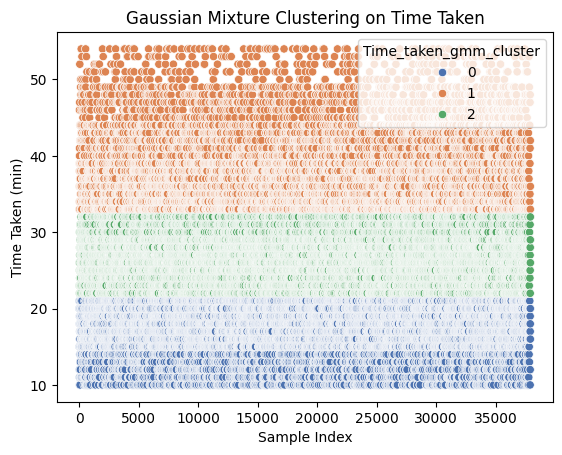

In [37]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)  # Example with 3 components
df['Time_taken_gmm_cluster'] = gmm.fit_predict(time_taken_reshaped)

# Visualize the GMM Clustering
sns.scatterplot(x=range(len(time_taken_reshaped)), y=df['Time_taken (min)'], hue=df['Time_taken_gmm_cluster'], palette='deep')
plt.title("Gaussian Mixture Clustering on Time Taken")
plt.xlabel("Sample Index")
plt.ylabel("Time Taken (min)")
plt.show()

# Use the GMM clusters as classes for classification tasks
y_gmm_clusters = df['Time_taken_gmm_cluster']


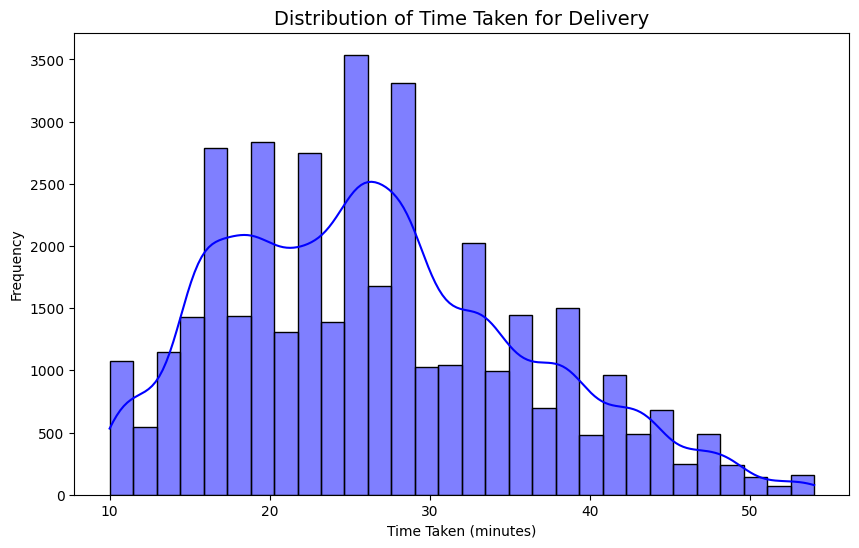

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Time_taken (min)'], kde=True, color='blue', bins=30)
plt.title("Distribution of Time Taken for Delivery", fontsize=14)
plt.xlabel("Time Taken (minutes)")
plt.ylabel("Frequency")
plt.show()


<ipython-input-39-265b3309a41e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather_conditions', y='Time_taken (min)', data=df, palette='coolwarm')


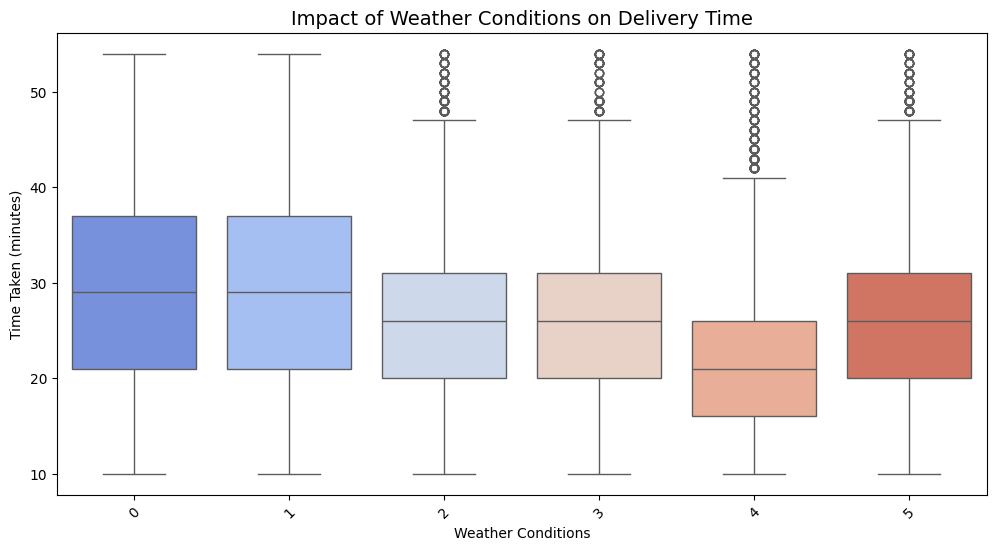

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather_conditions', y='Time_taken (min)', data=df, palette='coolwarm')
plt.title("Impact of Weather Conditions on Delivery Time", fontsize=14)
plt.xlabel("Weather Conditions")
plt.ylabel("Time Taken (minutes)")
plt.xticks(rotation=45)
plt.show()


<ipython-input-40-e03f544129a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Road_traffic_density', y='Time_taken (min)', data=df, palette='viridis')


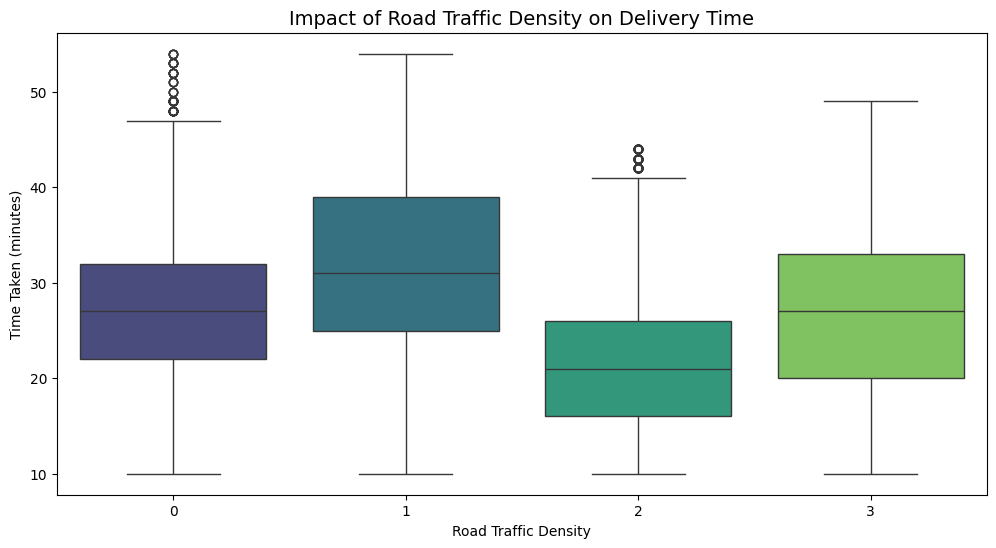

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Road_traffic_density', y='Time_taken (min)', data=df, palette='viridis')
plt.title("Impact of Road Traffic Density on Delivery Time", fontsize=14)
plt.xlabel("Road Traffic Density")
plt.ylabel("Time Taken (minutes)")
plt.show()


<ipython-input-41-0cc468418497>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City', y='Delivery_person_Ratings', data=df, palette='Set2', ci=None)
<ipython-input-41-0cc468418497>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Delivery_person_Ratings', data=df, palette='Set2', ci=None)


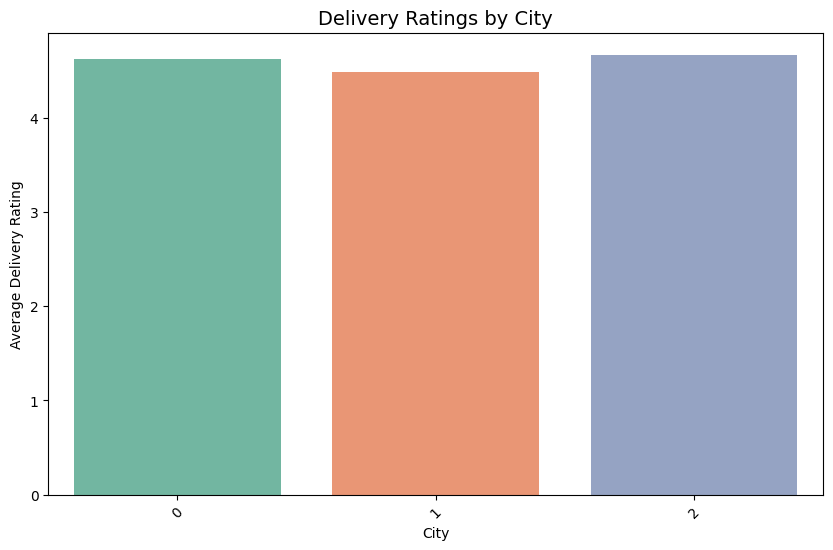

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Delivery_person_Ratings', data=df, palette='Set2', ci=None)
plt.title("Delivery Ratings by City", fontsize=14)
plt.xlabel("City")
plt.ylabel("Average Delivery Rating")
plt.xticks(rotation=45)
plt.show()


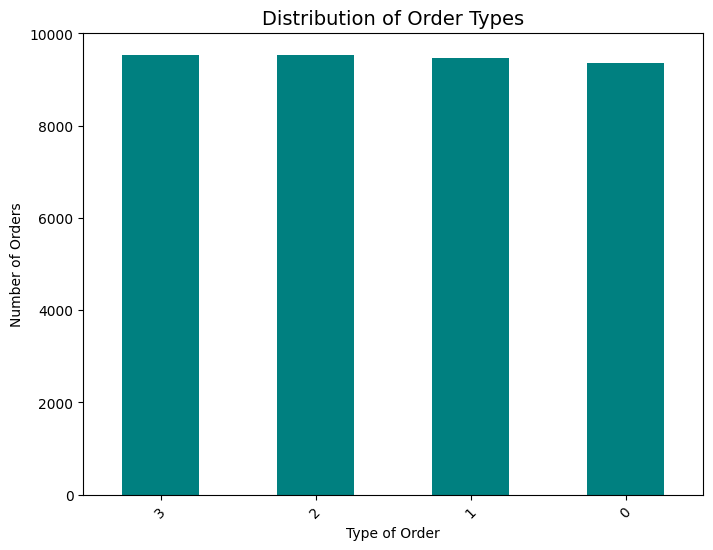

In [42]:
plt.figure(figsize=(8, 6))
order_counts = df['Type_of_order'].value_counts()
order_counts.plot(kind='bar', color='teal')
plt.title("Distribution of Order Types", fontsize=14)
plt.xlabel("Type of Order")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


<ipython-input-43-e3fae6e178fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='multiple_deliveries', y='Time_taken (min)', data=df, palette='Blues')


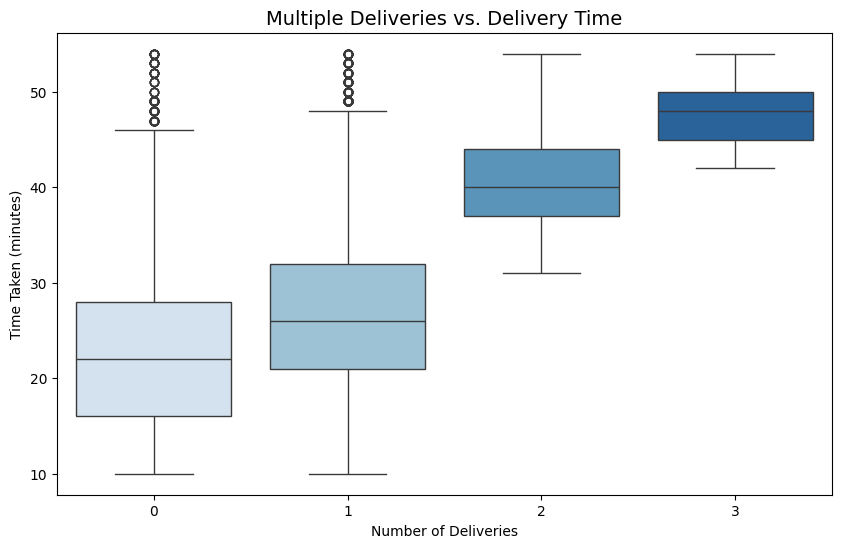

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='multiple_deliveries', y='Time_taken (min)', data=df, palette='Blues')
plt.title("Multiple Deliveries vs. Delivery Time", fontsize=14)
plt.xlabel("Number of Deliveries")
plt.ylabel("Time Taken (minutes)")
plt.show()


<ipython-input-45-941a56fd6099>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Festival', y='Time_taken (min)', data=df, palette='Set1')


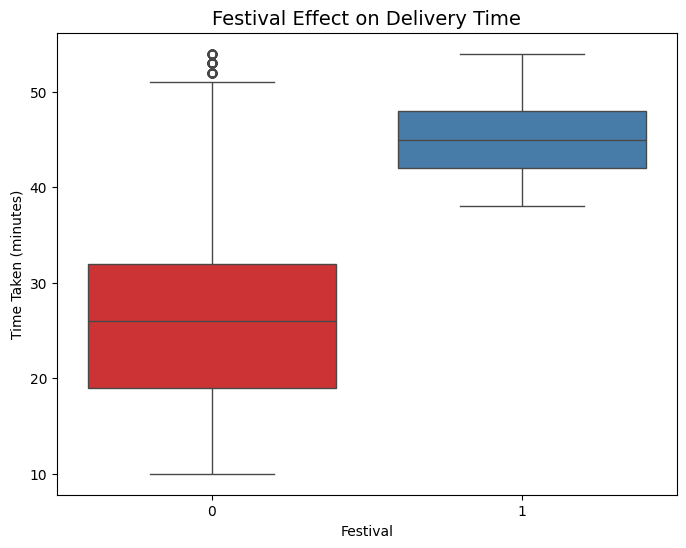

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Festival', y='Time_taken (min)', data=df, palette='Set1')
plt.title("Festival Effect on Delivery Time", fontsize=14)
plt.xlabel("Festival")
plt.ylabel("Time Taken (minutes)")
plt.show()



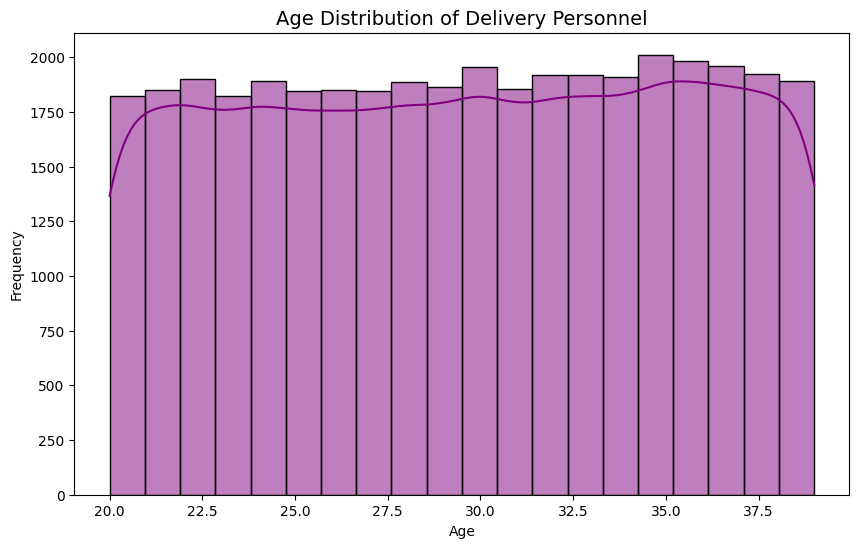

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_person_Age'], kde=True, color='purple', bins=20)
plt.title("Age Distribution of Delivery Personnel", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


<ipython-input-47-bba2968d35ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type_of_vehicle', y='Time_taken (min)', data=df, palette='coolwarm')


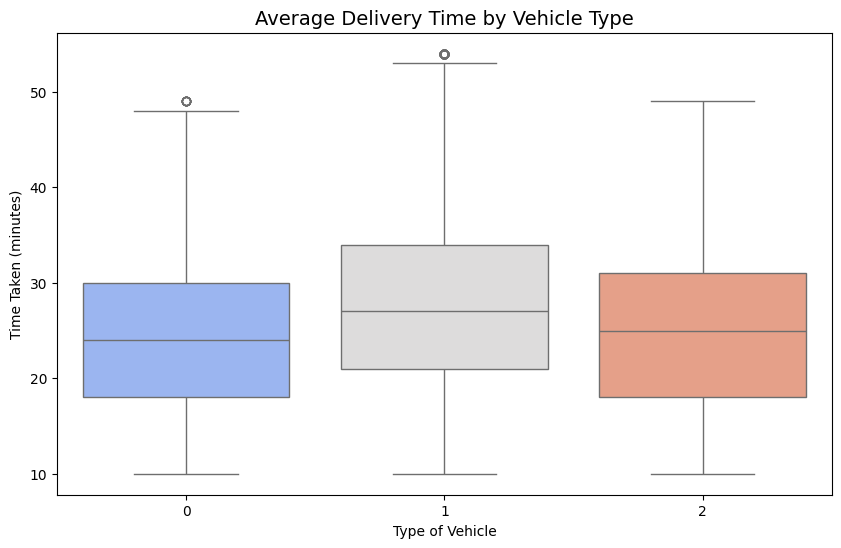

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type_of_vehicle', y='Time_taken (min)', data=df, palette='coolwarm')
plt.title("Average Delivery Time by Vehicle Type", fontsize=14)
plt.xlabel("Type of Vehicle")
plt.ylabel("Time Taken (minutes)")
plt.show()


<ipython-input-50-8f44c51e76f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Order_Hour', y='Time_taken (min)', data=df, palette='coolwarm')


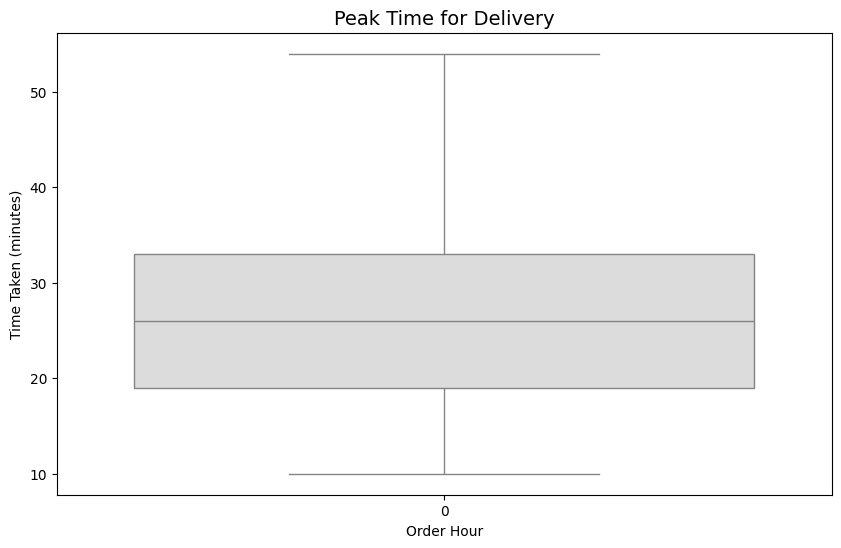

In [50]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Order_Hour', y='Time_taken (min)', data=df, palette='coolwarm')
plt.title("Peak Time for Delivery", fontsize=14)
plt.xlabel("Order Hour")
plt.ylabel("Time Taken (minutes)")
plt.show()


<ipython-input-51-1aa6236701b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Road_traffic_density', y='Time_taken (min)', data=df, palette='coolwarm')


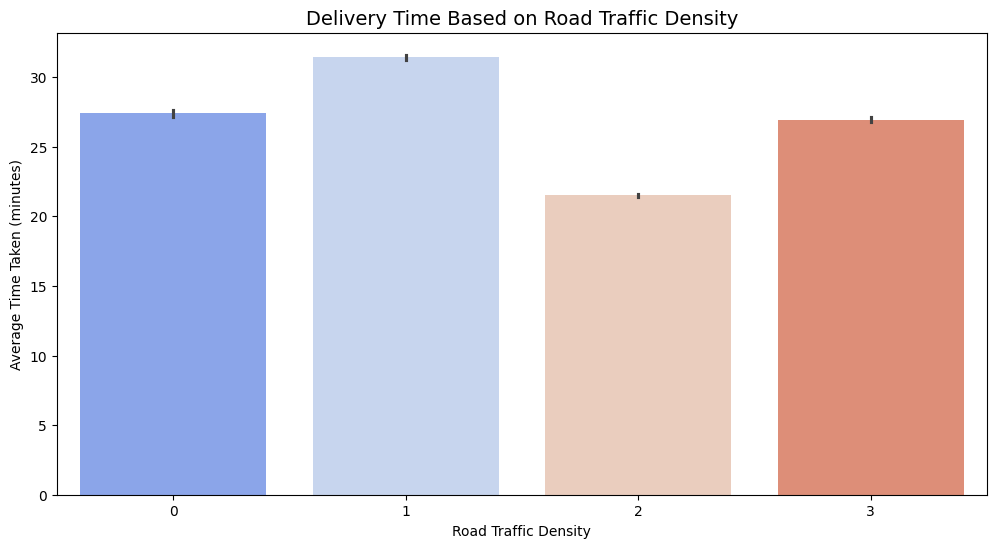

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Road_traffic_density', y='Time_taken (min)', data=df, palette='coolwarm')
plt.title("Delivery Time Based on Road Traffic Density", fontsize=14)
plt.xlabel("Road Traffic Density")
plt.ylabel("Average Time Taken (minutes)")
plt.show()


<ipython-input-52-29af5941ab37>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather_conditions', y='Time_taken (min)', data=weather_effect, palette='muted')


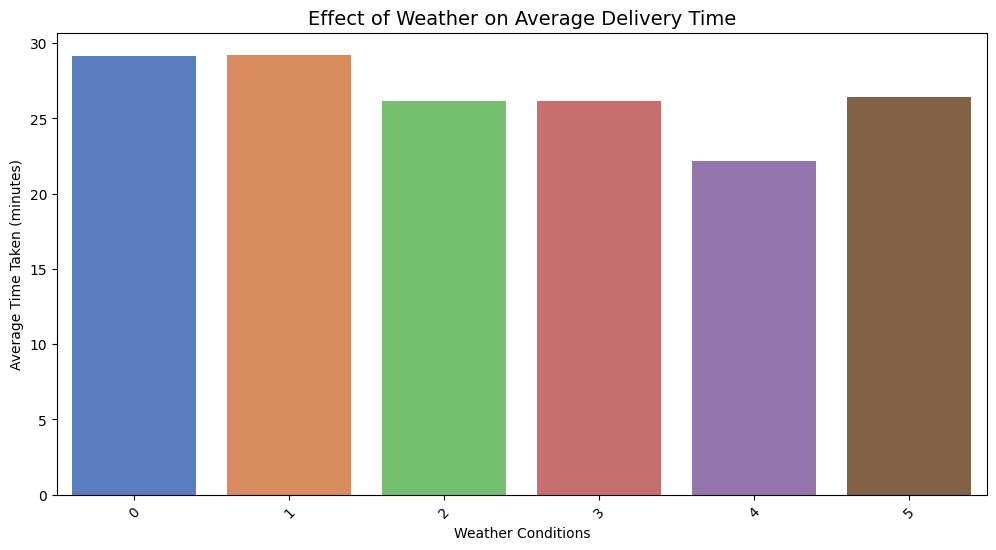

In [52]:
weather_effect = df.groupby('Weather_conditions')['Time_taken (min)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Weather_conditions', y='Time_taken (min)', data=weather_effect, palette='muted')
plt.title("Effect of Weather on Average Delivery Time", fontsize=14)
plt.xlabel("Weather Conditions")
plt.ylabel("Average Time Taken (minutes)")
plt.xticks(rotation=45)
plt.show()


<ipython-input-53-8b2a00eb5220>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='Time_taken (min)', data=df, palette='Blues')


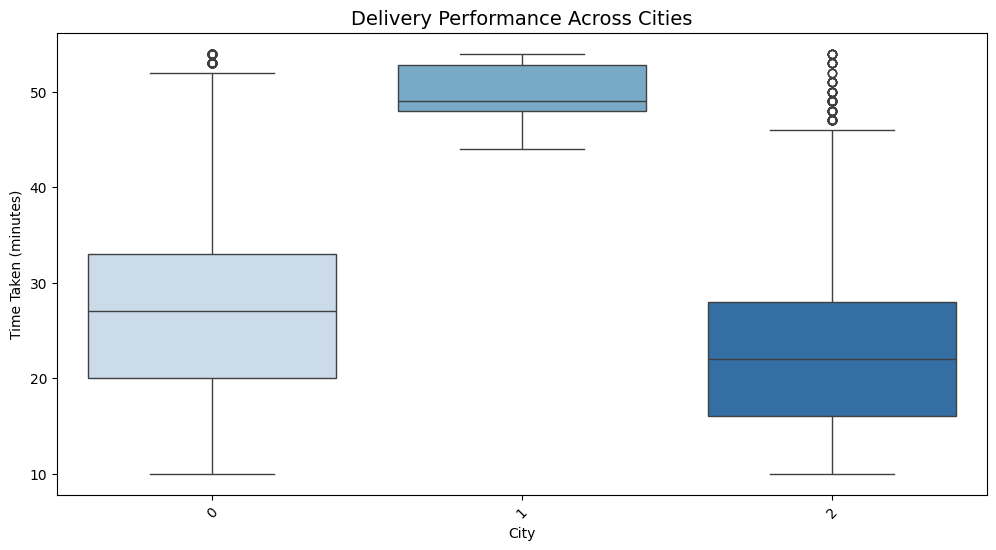

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Time_taken (min)', data=df, palette='Blues')
plt.title("Delivery Performance Across Cities", fontsize=14)
plt.xlabel("City")
plt.ylabel("Time Taken (minutes)")
plt.xticks(rotation=45)
plt.show()


<ipython-input-54-11108bd2625f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle_condition', y='Delivery_person_Ratings', data=df, palette='Pastel1')


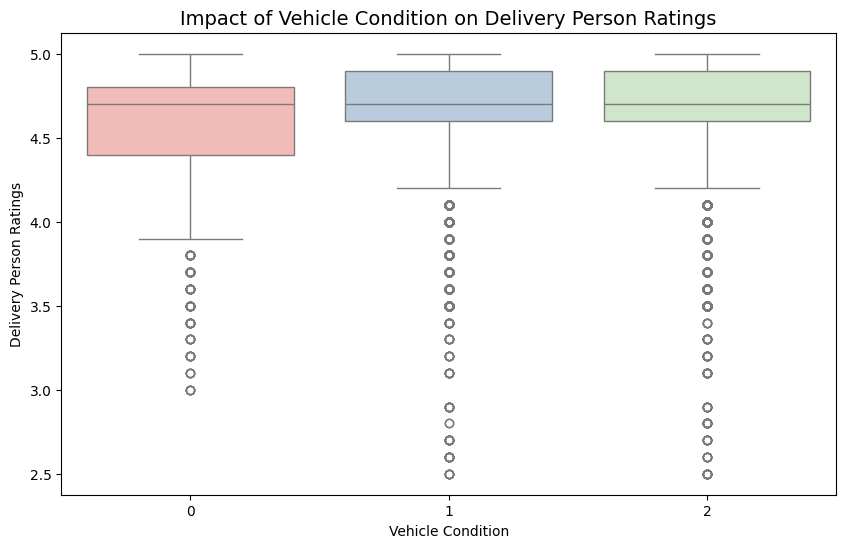

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_condition', y='Delivery_person_Ratings', data=df, palette='Pastel1')
plt.title("Impact of Vehicle Condition on Delivery Person Ratings", fontsize=14)
plt.xlabel("Vehicle Condition")
plt.ylabel("Delivery Person Ratings")
plt.show()


Time_Orderd    0
Order_Hour     0
dtype: int64


<ipython-input-58-7424b3a07c16>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Order_Hour', y='Time_taken (min)', data=df, palette='coolwarm', showfliers=False)


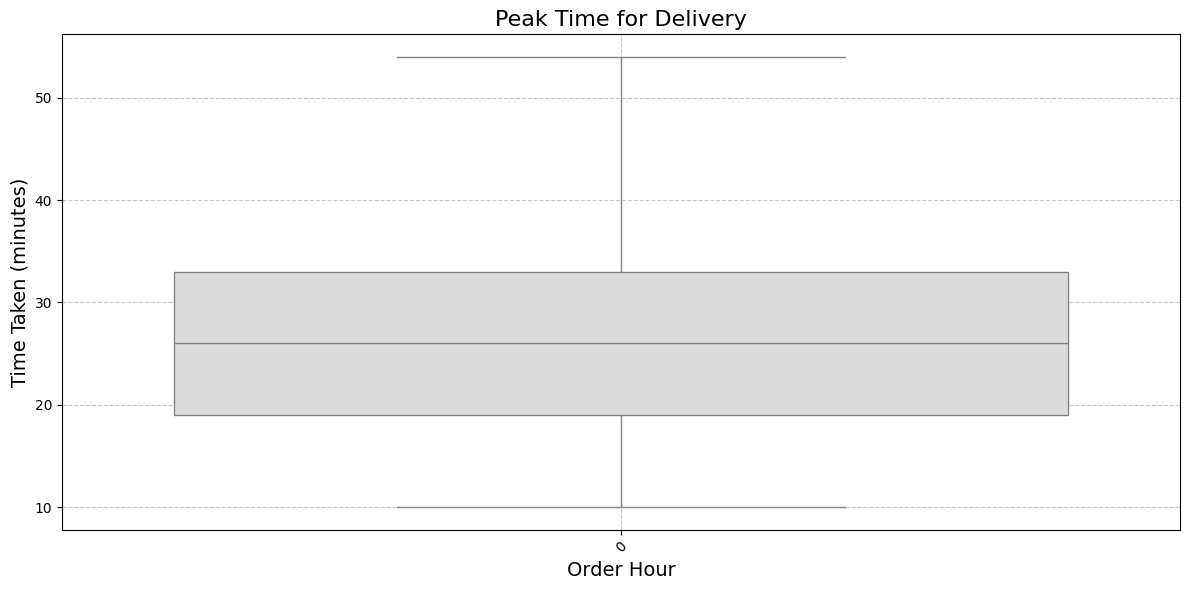

In [58]:
# If 'Time_Orderd' is numeric (encoded), we assume it's an hour (0-23) and convert to time format
if df['Time_Orderd'].dtype == 'int64':  # Check if Time_Orderd is numeric (encoded hour values)
    # Convert numeric hour value to datetime format
    df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H')  # Converts numeric hour to datetime

# If 'Time_Orderd' is a string or formatted time (HH:mm), convert to datetime
elif df['Time_Orderd'].dtype == 'O':  # Check if Time_Orderd is string
    df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M')

# Now, extract the hour from 'Time_Orderd'
df['Order_Hour'] = df['Time_Orderd'].dt.hour

# Check for any missing values in 'Order_Hour' or 'Time_taken (min)'
print(df[['Time_Orderd', 'Order_Hour']].isnull().sum())

# Plotting the relationship between Order Hour and Time Taken with better styling
plt.figure(figsize=(12, 6))
sns.boxplot(x='Order_Hour', y='Time_taken (min)', data=df, palette='coolwarm', showfliers=False)
plt.title("Peak Time for Delivery", fontsize=16)
plt.xlabel("Order Hour", fontsize=14)
plt.ylabel("Time Taken (minutes)", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to fit the plot
plt.show()
